<a href="https://colab.research.google.com/github/Jarrod555/Calculus-Projects/blob/main/copy_of_lagrange_error_bound_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

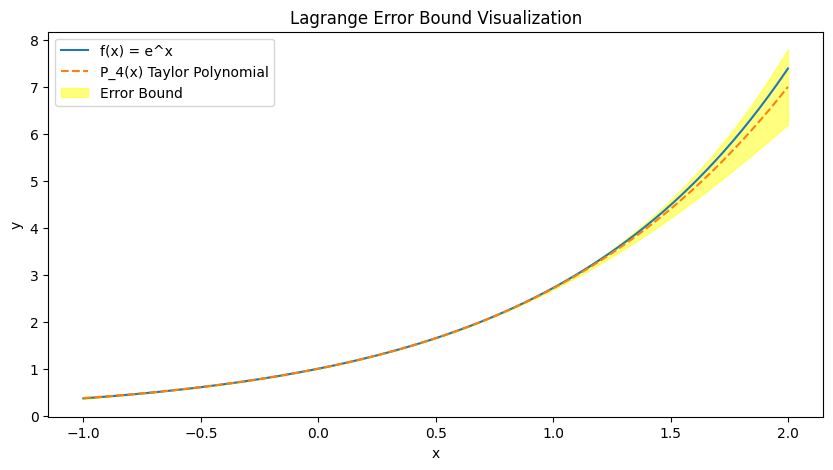

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import factorial

# Define the symbol
x = sp.symbols('x')

# Define the function to approximate
f = sp.exp(x)  # Example function

# Function to compute the Taylor polynomial
def taylor_series(f, a, n):
    i = 0
    p = 0
    while i <= n:
        p += (f.diff(x, i).subs(x, a) * (x - a)**i) / factorial(i)
        i += 1
    return p

# Calculate the Lagrange error bound
def lagrange_error_bound(f, a, x_val, n, M):
    error_bound = M * abs(x_val - a)**(n + 1) / factorial(n + 1)
    return error_bound

# Parameters for the plot
a = 0  # Center of the Taylor series
x_vals = np.linspace(-1, 2, 400)  # Range of x values for the plot
n = 4  # Degree of the Taylor polynomial
M = 3  # This is an example value

# Compute the Taylor polynomial
P_n = taylor_series(f, a, n)
P_n_func = sp.lambdify(x, P_n, 'numpy')

# Calculate function and polynomial values
f_func = sp.lambdify(x, f, 'numpy')
f_values = f_func(x_vals)
P_n_values = P_n_func(x_vals)

# Calculate error bound (for visualization purposes, we just plot a tube around the approximation)
error_bounds = [lagrange_error_bound(f, a, v, n, M) for v in x_vals]

# Plot the function, the Taylor polynomial, and the error bounds
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_values, label='f(x) = e^x')
plt.plot(x_vals, P_n_values, label=f'P_{n}(x) Taylor Polynomial', linestyle='--')
plt.fill_between(x_vals, P_n_values - error_bounds, P_n_values + error_bounds, color='yellow', alpha=0.5, label='Error Bound')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Lagrange Error Bound Visualization')
plt.show()


ImportError: ignored